# Importing required libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [8]:
city_day = 'E:\Projects\AQI Analysis\AQI-Analysis\Datasets\city_day.csv'
city_hour = 'E:\Projects\AQI Analysis\AQI-Analysis\Datasets\city_hour.csv'
station_day = 'E:\Projects\AQI Analysis\AQI-Analysis\Datasets\station_day.csv'
station_hour = 'E:\Projects\AQI Analysis\AQI-Analysis\Datasets\station_day.csv'
stations = 'E:\Projects\AQI Analysis\AQI-Analysis\Datasets\stations.csv'

In [9]:
cday_df = pd.read_csv(city_day, parse_dates=['Date'])
chour_df = pd.read_csv(city_hour)
sday_df = pd.read_csv(station_day, parse_dates=['Date'])
shour_df = pd.read_csv(station_hour)
stations_df = pd.read_csv(stations)

# Data Preprocessing

In [11]:
def dfInfo(df):
    '''
    Prints basic information such as shape, columns with missing values, etc about any input dataframe.

    Arguments:
        df(pandas DataFFrame)
    Returns:
        None
    '''
    print('='*50)
    print(f'Shape of the dataframe: {df.shape}')
    print('='*50)
    print(df.info())
    print('='*50)
    null_cols = [col for col in df.columns if df[col].isnull().sum() != 0]
    print(f'Columns with missing values: {null_cols}')


In [12]:
dfInfo(cday_df)

Shape of the dataframe: (29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object

*Observations*
- There are 29531 rows and 16 columns.
- The data type is correct for each feature.
- There are missing values in columns: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

#### Check null percentage of the missing values in city_day table

In [24]:
def null_percents(df):
    null_percent = []
    for col in df.columns:
        null_percent.append(df[col].isnull().sum() * 100 / len(df))
    null_df = pd.DataFrame({"Columns":df.columns, "Null_Percent":null_percent})
    null_df = null_df.sort_values(by=['Null_Percent'], ascending=False)
    return null_df

In [27]:
# checking null percentage of each column in a dataframe
cday_nullpercent = null_percents(cday_df)

In [26]:
cday_nullpercent

,Columns,Null_Percent
13,Xylene,61.322001
3,PM10,37.723071
7,NH3,34.973418
12,Toluene,27.229014
11,Benzene,19.041008
14,AQI,15.851139
15,AQI_Bucket,15.851139
2,PM2.5,15.570079
6,NOx,14.171549
10,O3,13.619586


In [29]:
cday_copy = cday_df.copy()
cday_copy.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [34]:
cday_copy['Xylene'].interpolate(method='linear', limit_direction="both", inplace=True)

In [36]:
cday_nullpcopy = null_percents(cday_copy)
cday_nullpcopy

,Columns,Null_Percent
3,PM10,37.723071
7,NH3,34.973418
12,Toluene,27.229014
11,Benzene,19.041008
14,AQI,15.851139
15,AQI_Bucket,15.851139
2,PM2.5,15.570079
6,NOx,14.171549
10,O3,13.619586
9,SO2,13.050692


In [38]:
cday_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [39]:
cday_copy.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,29531.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.399624,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,5.617543,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.250000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,2.601738,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,4.737919,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [40]:
cday_df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [45]:
avg_cityaqi = cday_df.groupby(['City'])['AQI'].mean().reset_index()
avg_cityaqi = avg_cityaqi.sort_values(by=['AQI'], ascending=False)
avg_cityaqi[:5]

,City,AQI
0,Ahmedabad,452.122939
10,Delhi,259.487744
21,Patna,240.782042
12,Gurugram,225.123882
19,Lucknow,217.973059


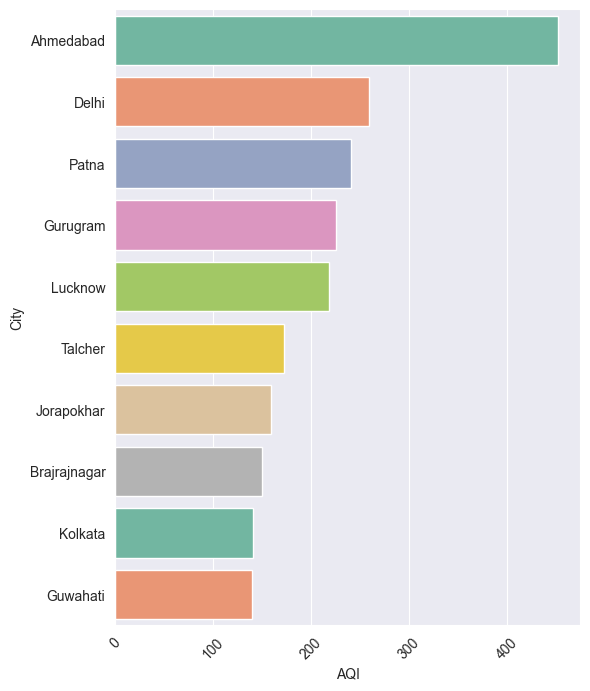

In [79]:
plt.figure(figsize=(6,8))
sns.barplot(data=avg_cityaqi[:10], y='City', x='AQI', palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# yearly ahmedabad

avg_cityaqi = cday_df.groupby(['City'])['AQI'].mean().reset_index()


In [67]:
ahmedabad_hours = chour_df[chour_df['City']=='Ahmedabad']
ahmedabad_hours.drop(columns=['City'], inplace=True)
ahmedabad_hours.head(3)

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\4114691368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_hours.drop(columns=['City'], inplace=True)


,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN


In [68]:
ahmedabad_hours['Datetime'] = pd.to_datetime(ahmedabad_hours['Datetime'])
dfInfo(ahmedabad_hours)

Shape of the dataframe: (48192, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48192 entries, 0 to 48191
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datetime    48192 non-null  datetime64[ns]
 1   PM2.5       31129 non-null  float64       
 2   PM10        8929 non-null   float64       
 3   NO          31562 non-null  float64       
 4   NO2         32037 non-null  float64       
 5   NOx         32344 non-null  float64       
 6   NH3         0 non-null      float64       
 7   CO          31562 non-null  float64       
 8   SO2         28955 non-null  float64       
 9   O3          28863 non-null  float64       
 10  Benzene     34774 non-null  float64       
 11  Toluene     34771 non-null  float64       
 12  Xylene      34764 non-null  float64       
 13  AQI         30921 non-null  float64       
 14  AQI_Bucket  30921 non-null  object        
dtypes: datetime64[ns](1), float64(13),

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\3249209712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_hours['Datetime'] = pd.to_datetime(ahmedabad_hours['Datetime'])


In [69]:
ahmedabad_nulls = null_percents(ahmedabad_hours)
ahmedabad_nulls

,Columns,Null_Percent
6,NH3,100.000000
2,PM10,81.472029
9,O3,40.108317
8,SO2,39.917414
13,AQI,35.837898
14,AQI_Bucket,35.837898
1,PM2.5,35.406292
3,NO,34.507802
7,CO,34.507802
4,NO2,33.522161


In [73]:
ahmedabad_hours['Year'] = ahmedabad_hours['Datetime'].dt.year
ahmedabad_yearlyaqi = ahmedabad_hours.groupby(['Year'])['AQI'].mean().reset_index()
ahmedabad_yearlyaqi

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\3193463894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_hours['Year'] = ahmedabad_hours['Datetime'].dt.year


,Year,AQI
0,2015,308.394104
1,2016,301.937944
2,2017,564.504348
3,2018,625.103687
4,2019,517.344423
5,2020,241.099326


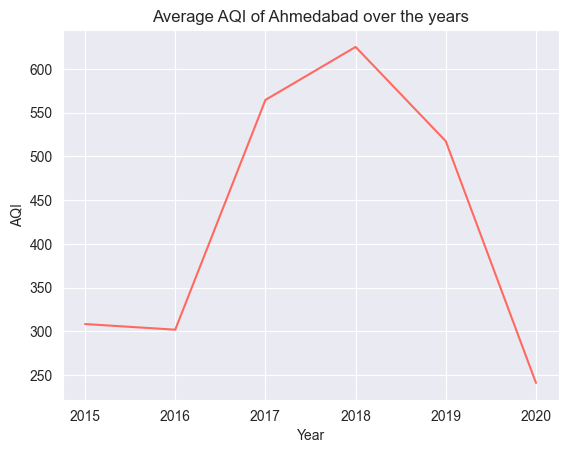

In [81]:
sns.lineplot(data=ahmedabad_yearlyaqi, x='Year', y='AQI', color='#ff6961')
plt.title('Average AQI of Ahmedabad over the years')
plt.show()

#### Missing values count of AQI in Ahmedabad city over the years.

In [103]:
ahmedabad_yearlynull = ahmedabad_hours[ahmedabad_hours['AQI'].isnull()]
check_null = ahmedabad_yearlynull.groupby(['Year'])['Datetime'].count().reset_index()
check_null

,Year,Datetime
0,2015,2687
1,2016,6109
2,2017,7150
3,2018,379
4,2019,584
5,2020,362


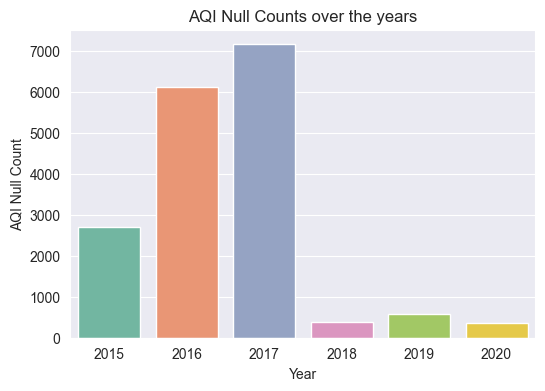

In [109]:
plt.figure(figsize=(6,4))

sns.barplot(data=check_null, y='Datetime', x='Year', palette='Set2')
plt.ylabel('AQI Null Count')
plt.title('AQI Null Counts over the years')
plt.show()

In [140]:
ahmedabad_hours['Hours'] = ahmedabad_hours['Datetime'].dt.hour
ahmedabad_hours['Month'] = ahmedabad_hours['Datetime'].dt.month


ahmedabad_2018 = ahmedabad_hours[ahmedabad_hours['Year']==2018]
ahemdabad_2018 = ahmedabad_2018.drop(columns=['Year'], inplace=True)

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\1565239453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_hours['Hours'] = ahmedabad_hours['Datetime'].dt.hour
C:\Users\farya\AppData\Local\Temp\ipykernel_14976\1565239453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_hours['Month'] = ahmedabad_hours['Datetime'].dt.month
C:\Users\farya\AppData\Local\Temp\ipykernel_14976\1565239453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [142]:
ahmedabad_2018

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Hours,Month
26303,2018-01-01 00:00:00,78.43,NaN,23.79,126.91,79.66,NaN,23.79,74.95,24.63,11.18,40.92,3.21,340.0,Very Poor,0,1
26304,2018-01-01 01:00:00,77.60,NaN,7.71,105.18,57.06,NaN,7.71,NaN,50.90,11.94,40.68,3.21,340.0,Very Poor,1,1
26305,2018-01-01 02:00:00,74.23,NaN,5.13,71.65,38.78,NaN,5.13,NaN,86.82,11.63,34.19,3.21,340.0,Very Poor,2,1
26306,2018-01-01 03:00:00,63.43,NaN,5.36,62.14,34.32,NaN,5.36,146.82,88.05,10.26,24.79,3.21,340.0,Very Poor,3,1
26307,2018-01-01 04:00:00,64.57,NaN,5.04,64.52,35.23,NaN,5.04,117.86,87.30,7.39,21.28,3.21,340.0,Very Poor,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2018-12-31 19:00:00,54.38,NaN,56.10,198.88,78.57,NaN,56.10,116.28,19.72,4.10,32.28,7.05,530.0,Severe,19,12
35059,2018-12-31 20:00:00,84.11,NaN,210.51,178.44,159.69,NaN,210.51,77.61,7.67,3.97,32.42,6.81,1438.0,Severe,20,12
35060,2018-12-31 21:00:00,160.51,NaN,366.40,89.90,319.11,NaN,366.40,76.70,8.95,3.97,32.37,6.88,2355.0,Severe,21,12
35061,2018-12-31 22:00:00,203.52,NaN,468.24,NaN,293.07,NaN,468.24,60.38,6.34,4.13,32.37,6.86,2954.0,Severe,22,12


In [147]:
avg_pollutants = ahmedabad_2018.groupby(['Month']).mean().reset_index()
avg_pollutants_new = avg_pollutants.copy()
avg_pollutants_new.drop(columns=['PM10', 'NH3', 'Hours'], inplace=True)

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\319485531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pollutants = ahmedabad_2018.groupby(['Month']).mean().reset_index()


In [148]:
avg_pollutants_new

,Month,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,1,88.675230,32.195540,140.834603,94.427868,32.195540,107.991594,52.094322,18.094728,71.944547,13.063570,690.421569
1,2,103.768204,57.412554,157.843191,122.929340,57.412554,120.496310,40.919174,5.027865,32.172348,8.351609,959.590909
2,3,96.970713,34.478138,114.671961,86.291697,34.478138,91.412615,50.722028,12.395688,51.708707,10.496954,783.368272
3,4,82.533053,22.757889,62.190058,46.887007,22.757889,50.320000,44.091407,7.726705,32.081410,5.347496,559.161850
4,5,53.997694,12.199764,32.563771,24.525486,12.199764,68.576850,33.765168,7.980861,31.998208,1.155931,322.962644
5,6,56.118012,28.942744,45.381307,43.650172,28.942744,42.028537,14.279276,6.073793,47.643496,1.540632,428.513196
6,7,56.220368,27.766269,59.019227,49.528684,27.766269,25.774885,2.617897,7.103514,40.955658,1.449824,453.788978
7,8,41.815777,27.498951,54.575395,47.109905,27.498951,72.547810,12.785711,5.471839,25.663120,1.299755,465.616231
8,9,23.521590,31.005607,85.412249,64.803077,31.005607,60.622407,35.100552,3.980311,16.533743,0.650000,557.982919
9,10,96.716842,37.047978,100.471025,54.608479,37.047978,77.836222,55.422032,5.256505,20.599363,10.109597,697.305014


<Axes: xlabel='Month', ylabel='PM2.5'>

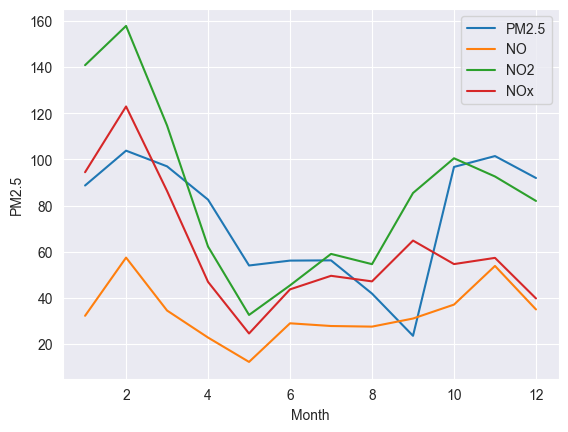

In [161]:
# fig, ax = plt.subplots(4,3,figsize=(15,8), sharey=True)
# ax[0,0].plot(x=avg_pollutants_new['Month'],y=avg_pollutants_new['PM2.5']) 
sns.lineplot( x=avg_pollutants_new['Month'], y=avg_pollutants_new['PM2.5'], label='PM2.5')
# ax[0,0].set_title('PM2.5')

sns.lineplot(x=avg_pollutants_new['Month'], y=avg_pollutants_new['NO'], label='NO')
# ax[0,1].set_title('NO')

sns.lineplot(x=avg_pollutants_new['Month'], y=avg_pollutants_new['NO2'], label='NO2')
# ax[0,2].set_title('NO2')

sns.lineplot(x=avg_pollutants_new['Month'], y=avg_pollutants_new['NOx'], label='NOx')
# ax[1,0].set_title('NOx')







<Axes: xlabel='Month', ylabel='PM2.5'>

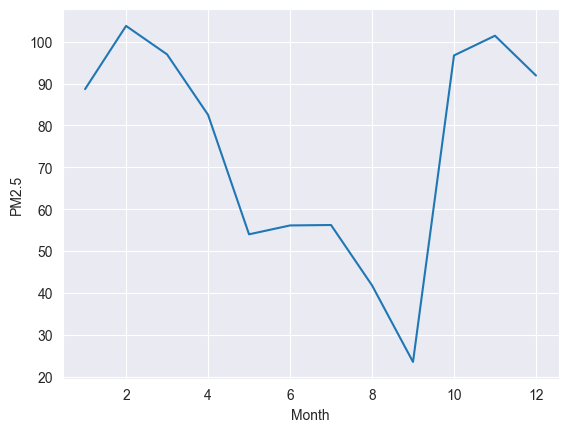

In [145]:
sns.lineplot(data=avg_pollutants, x='Month', y='PM2.5')

In [126]:
peakhours_2018 = ahmedabad_2018.groupby(['Hours'])['AQI'].mean().reset_index()
peakhours_2018 = peakhours_2018.sort_values(by=['AQI'], ascending=False)
peakhours_2018


,Hours,AQI
3,3,934.823362
2,2,925.086705
4,4,924.316239
1,1,920.861272
0,0,901.881159
23,23,885.864162
5,5,881.542614
22,22,828.887608
6,6,774.096866
21,21,730.092219


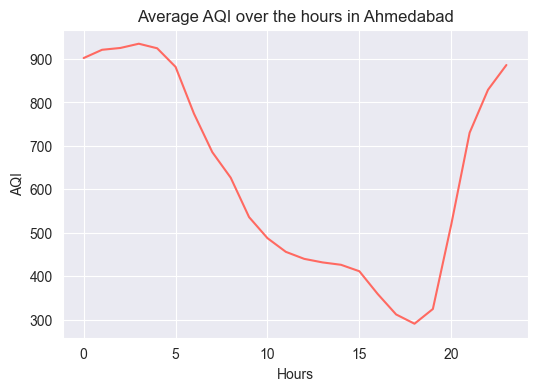

In [125]:
plt.figure(figsize=(6,4))
sns.lineplot(data=peakhours_2018, x='Hours', y='AQI', color='#ff6961')
plt.title('Average AQI over the hours in Ahmedabad')
plt.show()

In [118]:
aqibucket_2018 = ahmedabad_2018.groupby(['Hours', 'AQI_Bucket'])['AQI'].count()
aqibucket_2018

Hours  AQI_Bucket
0      Moderate       19
       Poor           14
       Severe        264
       Very Poor      48
1      Moderate       18
                    ... 
22     Very Poor      54
23     Moderate       20
       Poor           18
       Severe        262
       Very Poor      46
Name: AQI, Length: 98, dtype: int64

In [127]:
aqi_3am = ahmedabad_2018[ahmedabad_2018['Hours']==3]
aqi_3am

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Hours
26306,2018-01-01 03:00:00,63.43,NaN,5.36,62.14,34.32,NaN,5.36,146.82,88.05,10.26,24.79,3.21,340.0,Very Poor,3
26330,2018-01-02 03:00:00,56.60,NaN,5.25,75.39,40.69,NaN,5.25,103.38,48.02,11.25,52.48,3.21,186.0,Moderate,3
26354,2018-01-03 03:00:00,41.43,NaN,5.42,27.44,17.43,NaN,5.42,59.19,112.60,4.44,21.55,3.21,511.0,Severe,3
26378,2018-01-04 03:00:00,69.97,NaN,5.35,88.49,47.16,NaN,5.35,75.82,NaN,11.87,55.88,4.91,604.0,Severe,3
26402,2018-01-05 03:00:00,68.33,NaN,6.62,208.49,106.64,NaN,6.62,65.28,13.71,13.74,38.28,3.21,549.0,Severe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34946,2018-12-27 03:00:00,105.67,NaN,91.09,93.89,73.07,NaN,91.09,123.02,25.14,4.02,32.25,6.81,1407.0,Severe,3
34970,2018-12-28 03:00:00,179.34,NaN,119.01,77.80,84.79,NaN,119.01,82.13,13.52,4.01,32.28,7.00,2780.0,Severe,3
34994,2018-12-29 03:00:00,70.76,NaN,7.09,60.39,18.32,NaN,7.09,68.78,45.51,4.19,32.33,6.99,424.0,Severe,3
35018,2018-12-30 03:00:00,61.31,NaN,6.71,38.77,12.96,NaN,6.71,54.46,65.66,4.01,32.25,6.99,637.0,Severe,3


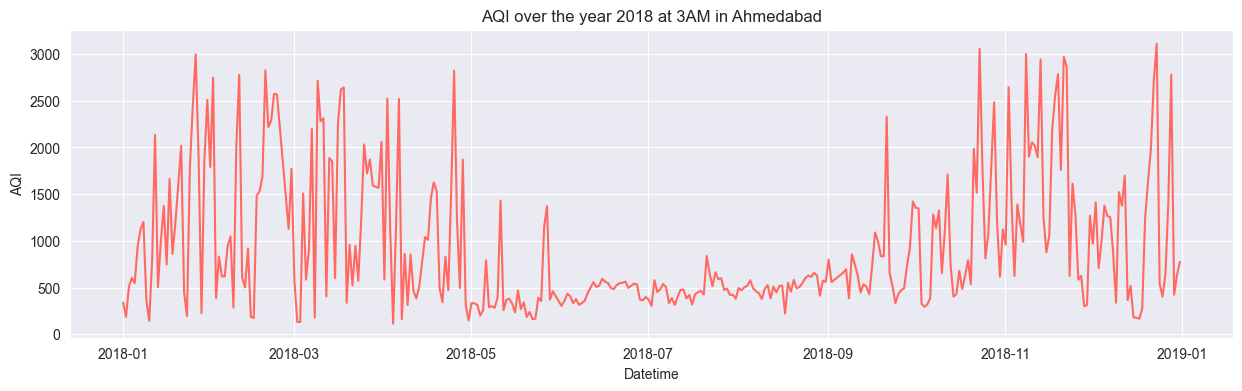

In [134]:
plt.figure(figsize=(15,4))
sns.lineplot(data=aqi_3am, x='Datetime', y='AQI', color='#ff6961')
plt.title('AQI over the year 2018 at 3AM in Ahmedabad')
plt.show()


In [135]:
aqi_3am['Month'] = aqi_3am['Datetime'].dt.month

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\2602269222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_3am['Month'] = aqi_3am['Datetime'].dt.month


In [136]:
ahmedabad_2018['Month'] = ahmedabad_2018['Datetime'].dt.month
ahemdabad_2018

C:\Users\farya\AppData\Local\Temp\ipykernel_14976\1643916874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_2018['Month'] = ahmedabad_2018['Datetime'].dt.month


In [139]:
ahemdabad_2018